In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!head heart_failure_clinical_records_dataset.csv

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1
75,1,246,0,15,0,127000,1.2,137,1,0,10,1
60,1,315,1,60,0,454000,1.1,131,1,1,10,1
65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1


In [3]:
data = 'heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(data, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Data Preprocessing

Modifying columns that holds binary/boolean data type.

In [4]:
cat_cols = list(filter(lambda x: x if len(df[x].unique()) <= 2 else None, df.columns))
df[cat_cols] = df[cat_cols].astype('category')

In [6]:
boolean_values = {
    1: 'yes',
    0: 'no'
}

sex_values = {
    1: 'male',
    0: 'female'
}

for x in cat_cols:
    if x != "sex":
        df[x] = df[x].map(boolean_values)
    else:
        df[x] = df[x].map(sex_values)

In [7]:
df['sex'].value_counts()

male      194
female    105
Name: sex, dtype: int64

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,yes


In [59]:
df[df["DEATH_EVENT"] == "no"]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,yes,80,no,30,yes,427000.0,1.0,138,female,no,12,no
20,65.0,yes,52,no,25,yes,276000.0,1.3,137,female,no,16,no
23,53.0,no,63,yes,60,no,368000.0,0.8,135,male,no,22,no
33,50.0,yes,159,yes,30,no,302000.0,1.2,138,female,no,29,no
38,60.0,no,2656,yes,30,no,305000.0,2.3,137,male,no,30,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,no,61,yes,38,yes,155000.0,1.1,143,male,yes,270,no
295,55.0,no,1820,no,38,no,270000.0,1.2,139,female,no,271,no
296,45.0,no,2060,yes,60,no,742000.0,0.8,138,female,no,278,no
297,45.0,no,2413,no,38,no,140000.0,1.4,140,male,yes,280,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

### Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = (X_train.DEATH_EVENT == 'yes').astype('int').values
y_test = (X_test.DEATH_EVENT == 'yes').astype('int').values

del X_train['DEATH_EVENT']
del X_test['DEATH_EVENT']

We count how many boolean values have on both train and test set.  

In [10]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([168,  71], dtype=int64))

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([35, 25], dtype=int64))

Calling `DictVectorizer` to turn lists of mappings of feature names and values into Numpy arrays.

In [12]:
from sklearn.feature_extraction import DictVectorizer

# Filling missing values with 0
dict_train = X_train.to_dict(orient='records')
dict_test = X_test.to_dict(orient='records')

In [13]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(criterion="gini", max_depth=30, min_samples_leaf=0.2,
                                  min_samples_split=0.5, 
                                  class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=0.2, min_samples_split=0.5,
                       random_state=42)

In [15]:
# Prediction on training data
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9001928236083165

In [16]:
# Prediction on test data
y_pred = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.7948571428571427

In [17]:
dt_scores = []

max_depth_list = [10,20,30,40]
min_samples_leaf_list = [0.1, 0.2, 0.3]
min_samples_split_list = [0.3, 0.4, 0.5, 0.6]

for depth in max_depth_list:
    for samples_leaf in min_samples_leaf_list:
        for samples_split in min_samples_split_list:
            dt = DecisionTreeClassifier(criterion="gini", max_depth=depth, min_samples_leaf=samples_leaf,
                                      min_samples_split=samples_split, 
                                      class_weight="balanced", random_state=42)
            dt.fit(X_train, y_train)
            y_pred = dt.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred)

            dt_scores.append((depth, samples_leaf, samples_split, auc))

In [18]:
columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'auc']
decision_tree_scores = pd.DataFrame(dt_scores, columns=columns)

In [19]:
decision_tree_scores.pivot(index='min_samples_leaf', 
                           columns=['max_depth','min_samples_split'], values=['auc'])

auc                                                    \
max_depth                10                                      20             
min_samples_split       0.3       0.4       0.5       0.6       0.3       0.4   
min_samples_leaf                                                                
0.1                0.811429  0.811429  0.811429  0.805143  0.811429  0.811429   
0.2                0.802857  0.802857  0.794857  0.794857  0.802857  0.802857   
0.3                0.791429  0.791429  0.791429  0.791429  0.791429  0.791429   

                                                                               \
max_depth                                    30                                 
min_samples_split       0.5       0.6       0.3       0.4       0.5       0.6   
min_samples_leaf                                                                
0.1                0.811429  0.805143  0.811429  0.811429  0.811429  0.805143   
0.2                0.794857  0.794857  0.802857  0.802857  0.794857  0.794857   
0.3                0.791429  0.791429  0.791429  0.791429  0.791429  0.791429   

                                                           
max_depth                40                                
min_samples_split       0.3       0.4       0.5       0.6  
min_samples_leaf                                           
0.1                0.811429  0.811429  0.811429  0.805143  
0.2                0.802857  0.802857  0.794857  0.794857  
0.3                0.791429  0.791429  0.791429  0.791429

In [20]:
pd.pivot_table(decision_tree_scores, index='min_samples_leaf', values='auc', aggfunc=[np.max, np.min])

,amax,amin
,auc,auc
min_samples_leaf,,
0.1,0.811429,0.805143
0.2,0.802857,0.794857
0.3,0.791429,0.791429


In [21]:
pd.pivot_table(decision_tree_scores, index='max_depth', values='auc', aggfunc=[np.max, np.min])

,amax,amin
,auc,auc
max_depth,,
10,0.811429,0.791429
20,0.811429,0.791429
30,0.811429,0.791429
40,0.811429,0.791429


In [22]:
pd.pivot_table(decision_tree_scores, index='min_samples_split', values='auc', aggfunc=[np.max, np.min])

,amax,amin
,auc,auc
min_samples_split,,
0.3,0.811429,0.791429
0.4,0.811429,0.791429
0.5,0.811429,0.791429
0.6,0.805143,0.791429


In [23]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion="gini", max_depth=30, min_samples_leaf= 0.1,
                                      min_samples_split=0.3, 
                                      class_weight="balanced", random_state=42)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_dt)

0.8114285714285714

In [25]:
import bentoml

bentoml.sklearn.save_model("heart_failure_model_decision_tree", model_dt,
                        custom_objects={
                            "dictVectorizer": dv
                            },
                        signatures = {
                            "predict_proba": 
                                {"batchable": False}}
                          )

Model(tag="heart_failure_model_decision_tree:ulwoyzkzzkuts7fs", path="C:\Users\rizdi\bentoml\models\heart_failure_model_decision_tree\ulwoyzkzzkuts7fs\")

In [66]:
model_dt.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [62]:
y_pred_dt

array([0.70292887, 0.        , 0.2970297 , 0.92206367, 0.14758419,
       0.2970297 , 0.70292887, 0.14758419, 0.92206367, 0.2970297 ,
       0.14758419, 0.70292887, 0.2970297 , 0.14758419, 0.92206367,
       0.92206367, 0.14758419, 0.14758419, 0.92206367, 0.14758419,
       0.70292887, 0.70292887, 0.70292887, 0.92206367, 0.92206367,
       0.        , 0.        , 0.14758419, 0.2970297 , 0.        ,
       0.92206367, 0.        , 0.92206367, 0.92206367, 0.92206367,
       0.92206367, 0.14758419, 0.2970297 , 0.14758419, 0.14758419,
       0.92206367, 0.70292887, 0.14758419, 0.14758419, 0.70292887,
       0.2970297 , 0.2970297 , 0.        , 0.        , 0.        ,
       0.70292887, 0.        , 0.2970297 , 0.        , 0.        ,
       0.92206367, 0.70292887, 0.92206367, 0.        , 0.92206367])

In [71]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [72]:
dict_test[2]

{'age': 45.0,
 'anaemia': 'no',
 'creatinine_phosphokinase': 2442,
 'diabetes': 'yes',
 'ejection_fraction': 30,
 'high_blood_pressure': 'no',
 'platelets': 334000.0,
 'serum_creatinine': 1.1,
 'serum_sodium': 139,
 'sex': 'male',
 'smoking': 'no',
 'time': 129}

In [68]:
X_test[1]

array([5.00e+01, 0.00e+00, 1.00e+00, 2.98e+02, 1.00e+00, 0.00e+00,
       3.50e+01, 1.00e+00, 0.00e+00, 3.62e+05, 9.00e-01, 1.40e+02,
       0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 2.40e+02])

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_scores = []

for d in [5, 7, 9, 11]:
    for n in range(100, 301, 10):
        for s in [0.6, 0.8, 1.0]:
            rf = RandomForestClassifier(oob_score=True, 
                                        class_weight="balanced", n_jobs=-1, 
                                        n_estimators=n,
                                        max_depth=d,
                                        max_samples=s,
                                        random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred)
            rf_scores.append((d, n, s, auc))

In [27]:
columns = ['max_depth', 'n_estimators', 'max_samples', 'auc']
df_scores = pd.DataFrame(rf_scores, columns=columns)

In [28]:
pivot_rf_scores = df_scores.pivot(index='n_estimators', 
                           columns=['max_depth','max_samples'], values=['auc'])

In [29]:
pivot_rf_scores

auc                                                    \
max_depth           5                             7                        
max_samples        0.6       0.8       1.0       0.6       0.8       1.0   
n_estimators                                                               
100           0.870857  0.850286  0.851429  0.856000  0.837714  0.851429   
110           0.875429  0.849143  0.854857  0.858286  0.836571  0.856000   
120           0.870857  0.843429  0.857143  0.852571  0.837714  0.856000   
130           0.872000  0.844571  0.858286  0.859429  0.838857  0.851429   
140           0.876571  0.841143  0.856000  0.857143  0.843429  0.851429   
150           0.869714  0.843429  0.860571  0.860571  0.844571  0.852571   
160           0.866286  0.846857  0.861714  0.859429  0.843429  0.850286   
170           0.866286  0.844571  0.860571  0.857143  0.840000  0.850286   
180           0.864000  0.845714  0.861714  0.856000  0.845714  0.852571   
190           0.865143  0.844571  0.852571  0.853714  0.844571  0.848000   
200           0.861714  0.844571  0.851429  0.854857  0.838857  0.852571   
210           0.861714  0.848000  0.852571  0.854857  0.842286  0.849143   
220           0.866286  0.850286  0.851429  0.858286  0.843429  0.850286   
230           0.865143  0.849143  0.851429  0.858286  0.844571  0.849143   
240           0.864000  0.850286  0.851429  0.860571  0.843429  0.848000   
250           0.861714  0.851429  0.852571  0.861714  0.846857  0.845714   
260           0.864000  0.853714  0.851429  0.858286  0.845714  0.849143   
270           0.862857  0.854857  0.852571  0.858286  0.844571  0.846857   
280           0.860571  0.854857  0.850286  0.861714  0.844571  0.846857   
290           0.862857  0.851429  0.848000  0.857143  0.842286  0.845714   
300           0.860571  0.854857  0.846857  0.852571  0.845714  0.848000   

                                                                          
max_depth           9                             11                      
max_samples        0.6       0.8       1.0       0.6       0.8       1.0  
n_estimators                                                              
100           0.866857  0.849143  0.852000  0.870286  0.858857  0.858857  
110           0.863429  0.848571  0.848571  0.871429  0.858286  0.855429  
120           0.858286  0.857143  0.849143  0.862857  0.858286  0.855429  
130           0.861714  0.856000  0.846857  0.865143  0.861143  0.856000  
140           0.861143  0.853714  0.845714  0.863429  0.855429  0.850857  
150           0.852571  0.851429  0.849143  0.863429  0.852571  0.854286  
160           0.851429  0.850286  0.850286  0.862286  0.854286  0.851429  
170           0.852571  0.846857  0.850286  0.856000  0.849714  0.850286  
180           0.856000  0.850286  0.848000  0.855429  0.850286  0.852571  
190           0.854857  0.850286  0.845714  0.856000  0.852000  0.856000  
200           0.858857  0.848000  0.846857  0.856571  0.852571  0.853143  
210           0.858857  0.846857  0.849143  0.855429  0.855429  0.849714  
220           0.861143  0.846857  0.845714  0.856000  0.856571  0.850286  
230           0.860000  0.848000  0.849143  0.860000  0.854286  0.850857  
240           0.860571  0.842286  0.850286  0.861714  0.844000  0.852000  
250           0.860571  0.842286  0.848000  0.858857  0.848571  0.852571  
260           0.862857  0.841143  0.848000  0.857143  0.845143  0.853714  
270           0.859429  0.844571  0.843429  0.858857  0.849143  0.849143  
280           0.862857  0.843429  0.842286  0.862286  0.846286  0.848571  
290           0.864000  0.846857  0.842286  0.861143  0.847429  0.849143  
300           0.862857  0.846857  0.848000  0.862286  0.850286  0.850286

In [30]:
pivot_rf_scores.unstack(level=0).unstack()

n_estimators                    100       110       120       130       140  \
    max_depth max_samples                                                     
auc 5         0.6          0.870857  0.875429  0.870857  0.872000  0.876571   
              0.8          0.850286  0.849143  0.843429  0.844571  0.841143   
              1.0          0.851429  0.854857  0.857143  0.858286  0.856000   
    7         0.6          0.856000  0.858286  0.852571  0.859429  0.857143   
              0.8          0.837714  0.836571  0.837714  0.838857  0.843429   
              1.0          0.851429  0.856000  0.856000  0.851429  0.851429   
    9         0.6          0.866857  0.863429  0.858286  0.861714  0.861143   
              0.8          0.849143  0.848571  0.857143  0.856000  0.853714   
              1.0          0.852000  0.848571  0.849143  0.846857  0.845714   
    11        0.6          0.870286  0.871429  0.862857  0.865143  0.863429   
              0.8          0.858857  0.858286  0.858286  0.861143  0.855429   
              1.0          0.858857  0.855429  0.855429  0.856000  0.850857   

n_estimators                    150       160       170       180       190  \
    max_depth max_samples                                                     
auc 5         0.6          0.869714  0.866286  0.866286  0.864000  0.865143   
              0.8          0.843429  0.846857  0.844571  0.845714  0.844571   
              1.0          0.860571  0.861714  0.860571  0.861714  0.852571   
    7         0.6          0.860571  0.859429  0.857143  0.856000  0.853714   
              0.8          0.844571  0.843429  0.840000  0.845714  0.844571   
              1.0          0.852571  0.850286  0.850286  0.852571  0.848000   
    9         0.6          0.852571  0.851429  0.852571  0.856000  0.854857   
              0.8          0.851429  0.850286  0.846857  0.850286  0.850286   
              1.0          0.849143  0.850286  0.850286  0.848000  0.845714   
    11        0.6          0.863429  0.862286  0.856000  0.855429  0.856000   
              0.8          0.852571  0.854286  0.849714  0.850286  0.852000   
              1.0          0.854286  0.851429  0.850286  0.852571  0.856000   

n_estimators               ...       210       220       230       240  \
    max_depth max_samples  ...                                           
auc 5         0.6          ...  0.861714  0.866286  0.865143  0.864000   
              0.8          ...  0.848000  0.850286  0.849143  0.850286   
              1.0          ...  0.852571  0.851429  0.851429  0.851429   
    7         0.6          ...  0.854857  0.858286  0.858286  0.860571   
              0.8          ...  0.842286  0.843429  0.844571  0.843429   
              1.0          ...  0.849143  0.850286  0.849143  0.848000   
    9         0.6          ...  0.858857  0.861143  0.860000  0.860571   
              0.8          ...  0.846857  0.846857  0.848000  0.842286   
              1.0          ...  0.849143  0.845714  0.849143  0.850286   
    11        0.6          ...  0.855429  0.856000  0.860000  0.861714   
              0.8          ...  0.855429  0.856571  0.854286  0.844000   
              1.0          ...  0.849714  0.850286  0.850857  0.852000   

n_estimators                    250       260       270       280       290  \
    max_depth max_samples                                                     
auc 5         0.6          0.861714  0.864000  0.862857  0.860571  0.862857   
              0.8          0.851429  0.853714  0.854857  0.854857  0.851429   
              1.0          0.852571  0.851429  0.852571  0.850286  0.848000   
    7         0.6          0.861714  0.858286  0.858286  0.861714  0.857143   
              0.8          0.846857  0.845714  0.844571  0.844571  0.842286   
              1.0          0.845714  0.849143  0.846857  0.846857  0.845714   
    9         0.6          0.860571  0.862857  0.859429  0.862857  0.864000   
              0.8          0.842286  0

In [31]:
unstack_rf_score = pivot_rf_scores.unstack(level=0).unstack()


In [32]:
unstack_rf_score.index

MultiIndex([('auc',  5, 0.6),
            ('auc',  5, 0.8),
            ('auc',  5, 1.0),
            ('auc',  7, 0.6),
            ('auc',  7, 0.8),
            ('auc',  7, 1.0),
            ('auc',  9, 0.6),
            ('auc',  9, 0.8),
            ('auc',  9, 1.0),
            ('auc', 11, 0.6),
            ('auc', 11, 0.8),
            ('auc', 11, 1.0)],
           names=[None, 'max_depth', 'max_samples'])

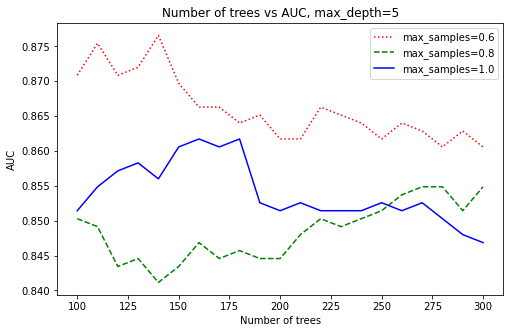

In [33]:
plt.figure(figsize=(8, 5))

num_trees = list(range(100, 301, 10))
plt.plot(num_trees, unstack_rf_score.loc[('auc',  5, 0.6)], label='max_samples=0.6', color='red', linestyle='dotted')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  5, 0.8)], label='max_samples=0.8', color='green', linestyle='dashed')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  5, 1.0)], label='max_samples=1.0', color='blue', linestyle='solid')
plt.title('Number of trees vs AUC, max_depth=5')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

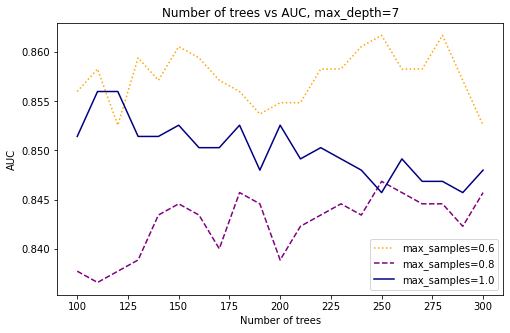

In [34]:
plt.figure(figsize=(8, 5))

num_trees = list(range(100, 301, 10))
plt.plot(num_trees, unstack_rf_score.loc[('auc',  7, 0.6)], label='max_samples=0.6', color='orange', linestyle='dotted')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  7, 0.8)], label='max_samples=0.8', color='purple', linestyle='dashed')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  7, 1.0)], label='max_samples=1.0', color='navy', linestyle='solid')
plt.title('Number of trees vs AUC, max_depth=7')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

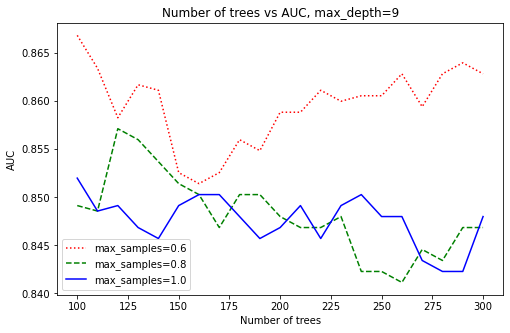

In [35]:
plt.figure(figsize=(8, 5))

num_trees = list(range(100, 301, 10))
plt.plot(num_trees, unstack_rf_score.loc[('auc',  9, 0.6)], label='max_samples=0.6', color='red', linestyle='dotted')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  9, 0.8)], label='max_samples=0.8', color='green', linestyle='dashed')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  9, 1.0)], label='max_samples=1.0', color='blue', linestyle='solid')
plt.title('Number of trees vs AUC, max_depth=9')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

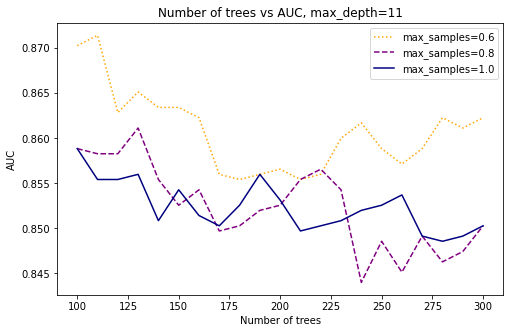

In [36]:
plt.figure(figsize=(8, 5))

num_trees = list(range(100, 301, 10))
plt.plot(num_trees, unstack_rf_score.loc[('auc',  11, 0.6)], label='max_samples=0.6', color='orange', linestyle='dotted')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  11, 0.8)], label='max_samples=0.8', color='purple', linestyle='dashed')
plt.plot(num_trees, unstack_rf_score.loc[('auc',  11, 1.0)], label='max_samples=1.0', color='navy', linestyle='solid')
plt.title('Number of trees vs AUC, max_depth=11')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

In [37]:
pd.pivot_table(df_scores, index='max_samples', values='auc', aggfunc=[np.max, np.min])

,amax,amin
,auc,auc
max_samples,,
0.6,0.876571,0.851429
0.8,0.861143,0.836571
1.0,0.861714,0.842286


In [38]:
pd.pivot_table(df_scores, index='n_estimators', values='auc', aggfunc=[np.max, np.min])

,amax,amin
,auc,auc
n_estimators,,
100,0.870857,0.837714
110,0.875429,0.836571
120,0.870857,0.837714
130,0.872000,0.838857
140,0.876571,0.841143
150,0.869714,0.843429
160,0.866286,0.843429
170,0.866286,0.840000


In [39]:
pd.pivot_table(df_scores, index='max_depth', values='auc', aggfunc=[np.max, np.min])

,amax,amin
,auc,auc
max_depth,,
5,0.876571,0.841143
7,0.861714,0.836571
9,0.866857,0.841143
11,0.871429,0.844000


In [40]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(oob_score=True, 
                                        class_weight="balanced", n_jobs=-1, 
                                        n_estimators=140,
                                        max_depth=5,
                                        max_samples=0.6,
                                        random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_samples=0.6,
                       n_estimators=140, n_jobs=-1, oob_score=True,
                       random_state=42)

In [41]:
y_pred_rf = model_rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_rf)

0.8765714285714286

In [73]:
bentoml.sklearn.save_model("heart_failure_model_random_forest", model_rf,
                        custom_objects={
                            "dictVectorizer": dv
                            },
                        signatures = {
                            "predict_proba": 
                                {"batchable": False}}
                          )

Model(tag="heart_failure_model_random_forest:jdzn3pcz3ouwy7fs", path="C:\Users\rizdi\bentoml\models\heart_failure_model_random_forest\jdzn3pcz3ouwy7fs\")

In [81]:
model_rf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [74]:
y_pred_rf

array([0.41113793, 0.05109905, 0.19640501, 0.85168451, 0.19037482,
       0.13290722, 0.56728519, 0.14139968, 0.69236059, 0.28944532,
       0.14022263, 0.28090252, 0.35596449, 0.15534764, 0.47944962,
       0.59758394, 0.08484228, 0.20002386, 0.42618714, 0.35232259,
       0.49230145, 0.33048995, 0.50366893, 0.64021035, 0.68766268,
       0.0860188 , 0.14132029, 0.12596586, 0.345487  , 0.1487945 ,
       0.62267564, 0.07166425, 0.71092575, 0.87197643, 0.71327829,
       0.64393034, 0.21833476, 0.4787194 , 0.21602296, 0.11470501,
       0.3826654 , 0.57838436, 0.14405326, 0.1762665 , 0.3446407 ,
       0.12959718, 0.38945556, 0.14877691, 0.11186801, 0.17745365,
       0.43743678, 0.15572402, 0.24556992, 0.08167667, 0.22408858,
       0.33468499, 0.28049029, 0.74827222, 0.12082656, 0.80845574])

In [75]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

### XGBoost Classifier

In [43]:
import xgboost as xgb

features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [44]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [45]:
y_pred = model.predict(dtest)
y_pred[:10]

array([0.7516652 , 0.02758984, 0.14972427, 0.93566394, 0.06789354,
       0.04907303, 0.44291663, 0.12415204, 0.87839067, 0.2518211 ],
      dtype=float32)

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.842857142857143

In [47]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [48]:
def parse_xgb_output(output):
    results = []    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

#### XGBoost Optimization with HyperOpt

Optimization, in mathematics perspective, is described as a process for a function to reaches a possible set of parameters that produces optimum solution. For machine learning, there are a few techniques that can help search space exploration to be much more efficient in time and efforts than grid-search and randomized-search CV. This section will see how optimization with HyperOpt gives a XGBoost model sets of parameters that yields an optimum return. 

More information on Hyperopt can be found at the following link: https://hyperopt.github.io/hyperopt/?source=post_page

Took inspiration from a kaggle https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#4.-Bayesian-Optimization-with-HYPEROPT-

In [49]:
# define a search space
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space = {
        'eta': hp.uniform("eta", 0.1, 0.6, 0.1),
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'reg_alpha' : hp.quniform('reg_alpha', 50, 100, 2),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1)
    }

In [50]:
def objective(space):
    model = xgb.train(space, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)
    y_pred = model.predict(dtest)
    roc_auc = roc_auc_score(y_test, y_pred)
    print ("ROC-AUC:", roc_auc)
    return {'loss': -roc_auc, 'status': STATUS_OK }
    
    

In [51]:
def score(params):
    print("Training with params: ")
    print(params)
    
    features = dv.get_feature_names_out()
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

    watchlist = [(dtrain, 'train'), (dtest, 'test')]
    xgb_model = xgb.train(params, dtrain, num_boost_round=10,
                          evals=watchlist,
                          verbose_eval=True)
    y_pred = xgb_model.predict(dtest)
    roc_auc = roc_auc_score(y_test, y_pred)
    # TODO: Add the importance for the selected features
    print("\tScore {0}\n\n".format(roc_auc))
    loss = 1 - roc_auc
    return {'loss': loss, 'status': STATUS_OK}

def optimize():
    space = {
        'eta': hp.quniform('eta', 0.1, 0.5, 0.05),
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        # 'reg_alpha' : hp.quniform('reg_alpha', 50, 100, 2),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
        'seed': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact'
    }
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=100)
    return best

In [52]:
best_hyperparams = optimize()
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

Training with params:                                                                                                             
{'booster': 'gbtree', 'colsample_bytree': 0.7000000000000001, 'eta': 0.4, 'eval_metric': 'auc', 'max_depth': 9, 'min_child_weight': 3.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1, 'tree_method': 'exact'}
[0]	train-auc:0.76626	test-auc:0.68286                                                                                            
[1]	train-auc:0.86066	test-auc:0.74057                                                                                            
[2]	train-auc:0.96110	test-auc:0.84000                                                                                            
[3]	train-auc:0.97221	test-auc:0.86114                                                                                            
[4]	train-auc:0.97330	test-auc:0.87600                                                                                         

Following the suggestion from [MLZoomcamp FAQ](https://docs.google.com/document/d/1LpPanc33QJJ6BSsyxVg-pWNMplal84TdZtq10naIhD8/edit#), feature names are excluded from building memory-based training and test sets.

In [93]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [97]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [98]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 11,
    'min_child_weight': 9.0,
    'colsample_bytree': 0.65,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'booster': 'gbtree',
    'tree_method': 'exact',
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [99]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8822857142857143

In [100]:
model.predict(dtest)

array([0.4591532 , 0.00750474, 0.06163992, 0.8092941 , 0.01923679,
       0.12963356, 0.555367  , 0.02457393, 0.92704463, 0.08555408,
       0.03446347, 0.4843679 , 0.09980921, 0.08391189, 0.64087737,
       0.8831536 , 0.02004872, 0.05723193, 0.45030463, 0.05803424,
       0.640913  , 0.1309465 , 0.31311277, 0.9335614 , 0.85654914,
       0.02299946, 0.02610333, 0.03291748, 0.31276354, 0.01011169,
       0.96050954, 0.00705027, 0.8172469 , 0.9748915 , 0.8221764 ,
       0.7199868 , 0.03537639, 0.6112746 , 0.02329996, 0.0285714 ,
       0.72027093, 0.7080764 , 0.03915167, 0.02722987, 0.08328678,
       0.04731282, 0.12349378, 0.02394503, 0.01595785, 0.01823574,
       0.4705517 , 0.09568688, 0.20622079, 0.00736268, 0.06353675,
       0.5319683 , 0.31378612, 0.891108  , 0.04207518, 0.9535788 ],
      dtype=float32)

In [101]:
y_pred_hard = np.where(y_pred>0.5,1,0)
y_pred_hard

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [102]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [103]:
len(list(y_test))

60

Counting how many correct prediction XGBoost made on test set

In [104]:
y_pred_hard == y_test

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True])

In [105]:
sum(y_pred_hard == y_test)

46

Converting XGBoost output IO into Pandas table.

In [106]:
xgb_out1 = parse_xgb_output(output)
xgb_out1

,num_iter,train_auc,val_auc
0,0,0.67991,0.70857
1,5,0.95242,0.88286
2,10,0.95276,0.90000
3,15,0.95666,0.88914
4,20,0.95779,0.88571
5,25,0.95749,0.88800
6,30,0.95791,0.89029
7,35,0.95808,0.88800
8,40,0.95808,0.88686
9,45,0.95783,0.88686


In [107]:
print(max(xgb_out1['train_auc']))
print(max(xgb_out1['val_auc']))

0.96156
0.9


In [108]:
xgb_out1['diff'] = xgb_out1['train_auc'] - xgb_out1['val_auc']
xgb_out1

,num_iter,train_auc,val_auc,diff
0,0,0.67991,0.70857,-0.02866
1,5,0.95242,0.88286,0.06956
2,10,0.95276,0.90000,0.05276
3,15,0.95666,0.88914,0.06752
4,20,0.95779,0.88571,0.07208
5,25,0.95749,0.88800,0.06949
6,30,0.95791,0.89029,0.06762
7,35,0.95808,0.88800,0.07008
8,40,0.95808,0.88686,0.07122
9,45,0.95783,0.88686,0.07097


In [109]:
import bentoml

bentoml.xgboost.save_model("heart_failure_model", model,
                        custom_objects={
                            "dictVectorizer": dv
                            },
                            signatures={
                                "predict": {
                                    "batchable": False,
                                    "batch_dim": 0,
                                }
                            }
                    )

Model(tag="heart_failure_model:tm7remcz46j4e7fs", path="C:\Users\rizdi\bentoml\models\heart_failure_model\tm7remcz46j4e7fs\")